
# GIS 712: Environmental Earth Observation and Remote Sensing

## Exploring different MODIS products for time-series analysis

<img src="imgs/modis_ndvi.jpg" width="650">

Sinusoidal projection, preserves area. Geographic projection does not preserve area, b/c lat/lon is different as we approach the poles.

### Quick Intro to MODIS products

In this lab and homework we will use time-series of MODIS vegetation indices derived from 2 MODIS products to understand potential changes in land cover since 2000.  

Modis data has two satellites Aqua and Terra, which are focused, as the names suggest, on water and land applications, respectively. Modis, unlike Landsat which has only up to 11 bands, has 36 bands. Given the relatively large number of bands, MODIS data are provided as several products, of which there are a lot. You can browse through the various MODIS products [here](https://modis.gsfc.nasa.gov/data/dataprod/).   
 
 To find out more about each product go to their respective links (e.g., [surface reflectance](https://modis.gsfc.nasa.gov/data/dataprod/mod09.php)). You will note differences in spatial resolution and temporal aggregation of the different MODIS products. While MODIS acquires data daily, only some products are made daily with other being composited (aggregation to account for cloud cover) over 8-days, 16-days or yearly (the land cover product).

 Generally speaking, for land applications the surface reflectance product is a good place to start. For example, if we wanted to look at vegetation indices as time-series over time, we could use the following MODIS products: Vegetation Indices (NDVI, EVI) (M0D13Q1), or Surface Reflectance (M0D09Q1), and/or Reflectance Nadir BRDF-Adjusted (NBAR) (MOD43B4).  

## OBJECTIVES: 

### 1. Use the Oak Ridge National Laboratory (ORNL) DAAC site for global MODIS subset data extractions.  
You are to extract the annual time series profiles of NDVI and EVI for the 2000-present period for the Albemarle-Pamlico sound Peninsula/the Alligator River Basin, a coastal area in NC that is experiencing tree dieback.

### 2. Work with pandas dataframe.  
More specifically reading a csv into a pandas data frame, selecting a subset of values, and using the mask function. An excellent summary of pandas is available [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html).

 ## Downloading MODIS data:  

 There are many ways of downloading Modis data. For example, through the [USGS Earth Explorer](https://earthexplorer.usgs.gov/), you will find Modis products under NASA LPDAAC Collections (a step-by-step tutorial on how to dwl the data this way if you are interested for later is available [here](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/modis-data-in-python/download-modis-hdf4-data/). 


 In this session, we will download Modis data from the Oak Ridge National Laboratory DAAC. Follow the steps below:

 1. Go to this [link](https://daac.ornl.gov/)
 2. Under “Tools” choose MODIS
 3. Choose the [Global subsets tool](https://modis.ornl.gov/globalsubset/)
 Navigate to the Albemarle-Pamlico sound Peninsula/the Alligator River Basin
 Choose the following location (Latitude: 35.62591, Longitude: -75.82428 (WGS84 datum)) and pick a window size of 3 by 3 km. 
 4. Choose the M0D13Q1 MODIS product: MODIS NDVI and EVI data, at 16-day composite intervals, and 250 m spatial resolution. 
 5. You can unselect the "Generate Geotiffs?". Leave the dates as they are (January 1, 2000 - September 20, 2022)
 5. Submit your order. You should receive it via email in a few minutes.  
  

 When you receive the email with your data order, click on the link and explore the tabs up top. Review the "Order Summary" and "Data Location".   

### **Q1: In what MODIS tile is your area located? What is the projection of the MODIS tile data?**  

 Go to the Download data tab and under CSV pick: "250m_16_days_NDVI.csv", "250m_16_days_EVI.csv" and "250m_16_days_pixel_reliability.csv".
 Create a subfolder in the folder you are working in and call it 'data'. Put your 3 csv files in the data subfolder.

 Have a look at your CSV files. 

 ### **Q2: What do the rows represent? what about the columns?**  

 The first 5 columns in each row will have the following info:
 MOD13Q1.A2000049.h11v05.006.2015136104550.250m_16_days_NDVI - entire product name

 MOD13Q1 - product name

 A2000065 - date: first 4 digits are the year and last 3 digits are the Julian day

 Lat35.62591Lon-75.82428Samp25Line25 - location info

 2015136021939 - processing date
 
 250m_16_days_NDVI - spatial and temporal resolution and product name.

 All the other values are actual pixel values.

 Let's start looking at the data.

In [1]:
# import modules
import os
import pandas as pd
from glob import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# make sure you are in the right folder by first checking your location with:
os.getcwd()
# if not in the right location (i.e., not ending in /modis), use the line below after uncommenting it
# and replace the 'PATH_TO_FOLDER with your path to the modis folder':
# os.chdir('PATH_TO_FOLDER')

'c:\\Users\\cblim\\Documents\\NCSU\\Courses\\GIS712\\code\\Lectures\\Lecture07\\modis'

In [12]:
# create a folder "data" to store our csvs
if not os.path.exists('data'): os.makedirs('data')
file_path = os.path.join(os.getcwd(), 'data', '250m_16_days_NDVI.csv') 
print("file_path is ", file_path)
# read csv
df=pd.read_csv(file_path, sep=',',header=None)

file_path is  c:\Users\cblim\Documents\NCSU\Courses\GIS712\code\Lectures\Lecture07\modis\data\250m_16_days_NDVI.csv


### Exploring the dataset

Run the commands below one at a time to visualize the data.  
You can uncomment the line using: crtl + /

In [13]:
type(df) # check that df is a pandas dataframe

pandas.core.frame.DataFrame

In [23]:
type(df) # check that df is a pandas dataframe
df.head() # first 5 rows
# df.values # get values from df
# df.values[5,:] # subsetting only row 5
# df.values[:,6:] # only the data values in pixels

,0,1,2,3,4,5,6,7,8,9,...,621,622,623,624,625,626,627,628,629,630
0,MOD13Q1.A2000049.h11v05.006.2015136104550.250m...,MOD13Q1,A2000049,Lat35.62591Lon-75.82428Samp25Line25,2015136104550,250m_16_days_NDVI,7652,7270,7413,7501,...,5177,4885,5534,5566,3770,3288,3288,-3000,-3000,2537
1,MOD13Q1.A2000065.h11v05.006.2015136021939.250m...,MOD13Q1,A2000065,Lat35.62591Lon-75.82428Samp25Line25,2015136021939,250m_16_days_NDVI,7526,7126,7154,7245,...,4666,4449,4878,4886,4886,3141,1719,2415,2213,-3000
2,MOD13Q1.A2000081.h11v05.006.2015136041509.250m...,MOD13Q1,A2000081,Lat35.62591Lon-75.82428Samp25Line25,2015136041509,250m_16_days_NDVI,7441,7291,7304,7419,...,4703,4976,5505,4850,2888,3712,2293,-3000,-3000,-3000
3,MOD13Q1.A2000097.h11v05.006.2015136041508.250m...,MOD13Q1,A2000097,Lat35.62591Lon-75.82428Samp25Line25,2015136041508,250m_16_days_NDVI,7610,7333,7407,7469,...,3987,5489,5859,5429,4212,3284,2385,1501,3344,-3000
4,MOD13Q1.A2000113.h11v05.006.2015137035703.250m...,MOD13Q1,A2000113,Lat35.62591Lon-75.82428Samp25Line25,2015137035703,250m_16_days_NDVI,7789,7589,7655,7664,...,5412,5412,6061,6127,5240,4117,4256,4093,3830,-3000


In [24]:
df.values

array([['MOD13Q1.A2000049.h11v05.006.2015136104550.250m_16_days_NDVI',
        'MOD13Q1', 'A2000049', ..., -3000, -3000, 2537],
       ['MOD13Q1.A2000065.h11v05.006.2015136021939.250m_16_days_NDVI',
        'MOD13Q1', 'A2000065', ..., 2415, 2213, -3000],
       ['MOD13Q1.A2000081.h11v05.006.2015136041509.250m_16_days_NDVI',
        'MOD13Q1', 'A2000081', ..., -3000, -3000, -3000],
       ...,
       ['MOD13Q1.A2020145.h11v05.006.2020162012922.250m_16_days_NDVI',
        'MOD13Q1', 'A2020145', ..., 3621, 5164, -3000],
       ['MOD13Q1.A2020161.h11v05.006.2020178013354.250m_16_days_NDVI',
        'MOD13Q1', 'A2020161', ..., 7308, 7123, 5757],
       ['MOD13Q1.A2020177.h11v05.006.2020196232637.250m_16_days_NDVI',
        'MOD13Q1', 'A2020177', ..., 4154, 3864, 3436]], dtype=object)

In [25]:
df.values[5,:] # subsetting only row 5

array(['MOD13Q1.A2000129.h11v05.006.2015137050912.250m_16_days_NDVI',
       'MOD13Q1', 'A2000129', 'Lat35.62591Lon-75.82428Samp25Line25',
       2015137050912, '250m_16_days_NDVI', 7872, 7889, 7709, 7683, 7717,
       7807, 7807, 7700, 7663, 7602, 7728, 7767, 7700, 7622, 7450, 7075,
       6915, 6766, 6628, 6614, 6554, 6499, 6530, 6557, 6564, 7889, 7810,
       7668, 7632, 7697, 7697, 7783, 7725, 7616, 7605, 7703, 7767, 7700,
       7511, 7346, 7020, 6746, 6766, 6628, 6612, 6581, 6474, 6467, 6557,
       6564, 7672, 7807, 7805, 7738, 7697, 7713, 7744, 7753, 7815, 7713,
       7703, 7636, 7575, 7589, 7194, 6738, 6746, 6441, 6544, 6492, 6425,
       6442, 6467, 6385, 6426, 7673, 7732, 7765, 7738, 7685, 7731, 7832,
       7879, 7765, 7713, 7722, 7714, 7696, 7361, 6873, 6738, 6545, 6557,
       6649, 6698, 6442, 6442, 6473, 6517, 6656, 7015, 7732, 7765, 7820,
       7738, 7714, 7854, 7879, 7765, 7762, 7708, 7633, 7438, 7361, 6873,
       6769, 7022, 7099, 6810, 6727, 6727, 6659, 6575, 669

In [26]:
df.values[:,6:] # only the data values in pixels

array([[7652, 7270, 7413, ..., -3000, -3000, 2537],
       [7526, 7126, 7154, ..., 2415, 2213, -3000],
       [7441, 7291, 7304, ..., -3000, -3000, -3000],
       ...,
       [8100, 8051, 8119, ..., 3621, 5164, -3000],
       [8023, 8158, 8206, ..., 7308, 7123, 5757],
       [8525, 8525, 8593, ..., 4154, 3864, 3436]], dtype=object)

In [27]:
df.values[:,2] # get the dates, in Julian dates

array(['A2000049', 'A2000065', 'A2000081', 'A2000097', 'A2000113',
       'A2000129', 'A2000145', 'A2000161', 'A2000177', 'A2000193',
       'A2000209', 'A2000225', 'A2000241', 'A2000257', 'A2000273',
       'A2000289', 'A2000305', 'A2000321', 'A2000337', 'A2000353',
       'A2001001', 'A2001017', 'A2001033', 'A2001049', 'A2001065',
       'A2001081', 'A2001097', 'A2001113', 'A2001129', 'A2001145',
       'A2001161', 'A2001177', 'A2001193', 'A2001209', 'A2001225',
       'A2001241', 'A2001257', 'A2001273', 'A2001289', 'A2001305',
       'A2001321', 'A2001337', 'A2001353', 'A2002001', 'A2002017',
       'A2002033', 'A2002049', 'A2002065', 'A2002081', 'A2002097',
       'A2002113', 'A2002129', 'A2002145', 'A2002161', 'A2002177',
       'A2002193', 'A2002209', 'A2002225', 'A2002241', 'A2002257',
       'A2002273', 'A2002289', 'A2002305', 'A2002321', 'A2002337',
       'A2002353', 'A2003001', 'A2003017', 'A2003033', 'A2003049',
       'A2003065', 'A2003081', 'A2003097', 'A2003113', 'A20031

In [28]:
# Defining a function to make our life easier! When dealing with MODIS data we need to convert Julian dates to calendar dates.
# The function below takes one argument: the column of Julian dates 

def julianTocalendar (juliandDatesColumn):
    '''
    julianDatesColumn: the column of a csv file that contains the Julian dates.
    '''
    dates = [(datetime.datetime(int(date[1:5]), 1, 1) + datetime.timedelta(int(date[5:]))).strftime('%Y-%m-%d') for date in juliandDatesColumn]
    return dates

### Get the NDVI data and store it in a new pandas data.frame

In [29]:
# add only the data to a data frame
ndvi_data = df.values[:,6:] #ndvi_data

# concatenate to a new pd data frame with dates as index on column 1 and pixel values 
ndvidata = pd.DataFrame(ndvi_data, index=julianTocalendar(df.values[:,2]))
ndvidata

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,7652,7270,7413,7501,7304,7141,7051,7351,7468,7581,...,5177,4885,5534,5566,3770,3288,3288,-3000,-3000,2537
2000-03-06,7526,7126,7154,7245,7078,7078,6916,7329,7444,7576,...,4666,4449,4878,4886,4886,3141,1719,2415,2213,-3000
2000-03-22,7441,7291,7304,7419,7315,7197,7154,7447,7508,7536,...,4703,4976,5505,4850,2888,3712,2293,-3000,-3000,-3000
2000-04-07,7610,7333,7407,7469,7523,7332,7139,7298,7456,7711,...,3987,5489,5859,5429,4212,3284,2385,1501,3344,-3000
2000-04-23,7789,7589,7655,7664,7704,7683,7727,7769,7775,7812,...,5412,5412,6061,6127,5240,4117,4256,4093,3830,-3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,6149,7022,7262,7475,7453,7121,7121,7263,7409,7454,...,5804,4748,5248,5027,4584,-3000,-3000,-3000,-3000,-3000
2020-05-09,7630,7654,7654,7816,7521,7626,7626,7851,7916,7960,...,6691,5558,5558,5558,5340,5340,3741,4982,4719,-3000
2020-05-25,8100,8051,8119,8079,7967,7799,7799,7671,7671,7474,...,7272,6641,6852,6531,6273,5701,3621,3621,5164,-3000
2020-06-10,8023,8158,8206,8206,8025,7969,7969,7636,7435,7063,...,7141,6938,7027,6445,4206,6351,6511,7308,7123,5757


### **Q3: how many rows and columns does the new data frame have?**

### Get the vegetation index reliability csv  
### **Q4: which column has the dates?**

In [30]:
# Let's read in the VI_reliability csv
vi_reliability_filepath = os.path.join(os.getcwd(), 'data', '250m_16_days_pixel_reliability.csv')
vi_reliability_df = pd.read_csv(vi_reliability_filepath, sep=',',header=None)
vi_reliability_df.head()

,0,1,2,3,4,5,6,7,8,9,...,621,622,623,624,625,626,627,628,629,630
0,MOD13Q1.A2000049.h11v05.006.2015136104550.250m...,MOD13Q1,A2000049,Lat35.62591Lon-75.82428Samp25Line25,2015136104550,250m_16_days_pixel_reliability,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,0
1,MOD13Q1.A2000065.h11v05.006.2015136021939.250m...,MOD13Q1,A2000065,Lat35.62591Lon-75.82428Samp25Line25,2015136021939,250m_16_days_pixel_reliability,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,MOD13Q1.A2000081.h11v05.006.2015136041509.250m...,MOD13Q1,A2000081,Lat35.62591Lon-75.82428Samp25Line25,2015136041509,250m_16_days_pixel_reliability,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,-1
3,MOD13Q1.A2000097.h11v05.006.2015136041508.250m...,MOD13Q1,A2000097,Lat35.62591Lon-75.82428Samp25Line25,2015136041508,250m_16_days_pixel_reliability,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,MOD13Q1.A2000113.h11v05.006.2015137035703.250m...,MOD13Q1,A2000113,Lat35.62591Lon-75.82428Samp25Line25,2015137035703,250m_16_days_pixel_reliability,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


### **Q5: what do the data values starting on column 6 represent?**  

To understand this, please check the pixel reliability information in Table 4 in the [MODIS VI User Guide c6 version](https://vip.arizona.edu/documents/MODIS/MODIS_VI_UsersGuide_June_2015_C6.pdf). 

#### This is important for our next steps.

In [32]:
# make the dates and reliability values into a new data frame
pixel_reliability = pd.DataFrame(vi_reliability_df.values[:,6:], index=julianTocalendar(vi_reliability_df.values[:,2]))
pixel_reliability 

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,0
2000-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2000-03-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,-1
2000-04-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2000-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-1,-1,-1,-1,-1
2020-05-09,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,-1
2020-05-25,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1
2020-06-10,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


Check to see if this makes sense looking at the CSV you've downloaded
### **Q6: What are the dimensions of this pandas data frame? Are they the same as the previous ndvi data data frame?**


Suppose we only wanted to keep the high confidence values, i.e. 0 values.  
You can use the .iloc function in pandas, which will give us a boolean (True and False) data frame with True where the condition (i.e., reliability = 0) is met 
The .iloc function in Pandas is primarily integer-location based indexing for selection by position. It allows you to select rows and columns by their integer-based position. The .iloc indexer is useful when you want to perform selection purely based on integer position.

In [33]:
hc_pixel_reliability_values = pixel_reliability.iloc[:,0:] == 0
hc_pixel_reliability_values 

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
2000-03-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2000-03-22,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
2000-04-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2000-04-23,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,False,False,False,False,False
2020-05-09,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2020-05-25,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2020-06-10,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


 What if we also want to keep marginal values, the 0s and 1s in the pixel_reliability pandas data frame ?  
 You can use the isin function in pandas; we also get a boolean data frame with True and False, where both conditions are met (i.e., reliability values are either 0 or 1) 
 The isin() function in Pandas is used to filter data frames, Series, or columns based on some condition that matches data in one or more columns against specified values. It's an extremely handy way to find, filter, and subset data.

In [34]:
good_pixel_reliability_values = pixel_reliability.iloc[:,0:].isin([0, 1])  
good_pixel_reliability_values 

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
2000-03-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2000-03-22,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
2000-04-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2000-04-23,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
2020-05-09,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2020-05-25,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2020-06-10,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


 Now we want to mask out the ndvi data that is not high confidence, and thus filter out those low confidence 
 values to only keep pixels where we have high confidence pixel values

In [35]:
ndvi_filt = ndvidata.mask(hc_pixel_reliability_values == False)
ndvi_filt

# another way of doing this  
# ndvidata.mask(hc_pixel_reliability_values == False)
# would be
# ndvi_filt = ndvidata.mask(pixel_reliability.iloc[:,0:] != 0)
# ndvi_filt

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,7652,7270,7413,7501,7304,7141,7051,7351,7468,7581,...,5177,4885,5534,5566,3770,3288,3288,NaN,NaN,2537
2000-03-06,7526,7126,7154,7245,7078,7078,6916,7329,7444,7576,...,4666,4449,4878,4886,4886,3141,1719,2415,2213,NaN
2000-03-22,7441,7291,7304,7419,7315,7197,7154,7447,7508,7536,...,4703,4976,5505,4850,2888,3712,2293,NaN,NaN,NaN
2000-04-07,7610,7333,7407,7469,7523,7332,7139,7298,7456,7711,...,3987,5489,5859,5429,4212,3284,2385,1501,3344,NaN
2000-04-23,7789,7589,7655,7664,7704,7683,7727,7769,7775,7812,...,5412,5412,6061,6127,5240,4117,4256,4093,3830,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,6149,7022,7262,7475,7453,7121,7121,7263,7409,7454,...,NaN,4748,5248,5027,4584,NaN,NaN,NaN,NaN,NaN
2020-05-09,7630,7654,7654,7816,7521,7626,7626,7851,7916,7960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7272,6641,6852,6531,6273,5701,3621,3621,5164,NaN
2020-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q7: does the location of NaN make sense?  

Given that we are looking at ndvi values, which don't go beyond 1 we need to rescale them, the scale factor in 
provided to us on pg 9 of the [MODIS User Guide](https://vip.arizona.edu/documents/MODIS/MODIS_VI_UsersGuide_June_2015_C6.pdf).

In [36]:
# From the user guide we find that the scale factor is 0.0001
# define a scale variable
scale = 0.0001
ndvi_filt_scale = ndvi_filt*float(scale)
# ndvi_filt_scale = ndvi_filt*scale
ndvi_filt_scale

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
2000-02-19,0.7652,0.727,0.7413,0.7501,0.7304,0.7141,0.7051,0.7351,0.7468,0.7581,...,0.5177,0.4885,0.5534,0.5566,0.377,0.3288,0.3288,NaN,NaN,0.2537
2000-03-06,0.7526,0.7126,0.7154,0.7245,0.7078,0.7078,0.6916,0.7329,0.7444,0.7576,...,0.4666,0.4449,0.4878,0.4886,0.4886,0.3141,0.1719,0.2415,0.2213,NaN
2000-03-22,0.7441,0.7291,0.7304,0.7419,0.7315,0.7197,0.7154,0.7447,0.7508,0.7536,...,0.4703,0.4976,0.5505,0.485,0.2888,0.3712,0.2293,NaN,NaN,NaN
2000-04-07,0.761,0.7333,0.7407,0.7469,0.7523,0.7332,0.7139,0.7298,0.7456,0.7711,...,0.3987,0.5489,0.5859,0.5429,0.4212,0.3284,0.2385,0.1501,0.3344,NaN
2000-04-23,0.7789,0.7589,0.7655,0.7664,0.7704,0.7683,0.7727,0.7769,0.7775,0.7812,...,0.5412,0.5412,0.6061,0.6127,0.524,0.4117,0.4256,0.4093,0.383,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,0.6149,0.7022,0.7262,0.7475,0.7453,0.7121,0.7121,0.7263,0.7409,0.7454,...,NaN,0.4748,0.5248,0.5027,0.4584,NaN,NaN,NaN,NaN,NaN
2020-05-09,0.763,0.7654,0.7654,0.7816,0.7521,0.7626,0.7626,0.7851,0.7916,0.796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7272,0.6641,0.6852,0.6531,0.6273,0.5701,0.3621,0.3621,0.5164,NaN
2020-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# now add 3 columns that compute mean, median and st dev of the NDVI values per date
# defaults in pandas is to skip the NaNs skipna=True, try skipna=False, what do you get?
ndvistats = pd.DataFrame(np.column_stack([ndvi_filt_scale.mean(axis=1), 
										 ndvi_filt_scale.median(axis=1),
                                         ndvi_filt_scale.std(axis=1)]), 
                        columns=['mean', 'median', 'sd'], index=julianTocalendar(df.values[:,2]))
ndvistats

,mean,median,sd
2000-02-19,0.660218,0.6767,0.094433
2000-03-06,0.645289,0.6645,0.099812
2000-03-22,0.661097,0.6752,0.09509
2000-04-07,0.652329,0.665,0.098673
2000-04-23,0.684319,0.6918,0.082089
...,...,...,...
2020-04-23,0.643015,0.65805,0.093192
2020-05-09,0.67504,0.6979,0.087767
2020-05-25,0.657912,0.6643,0.093448
2020-06-10,0.684076,0.6846,0.110439


In [39]:
# Same thing as above but being explicit about skipna=True
# now add 3 columns that compute mean, median and st dev of the NDVI values per date
ndvistats = pd.DataFrame(np.column_stack([ndvi_filt_scale.mean(axis=1, skipna=True), 
										 ndvi_filt_scale.median(axis=1, skipna=True),
                                         ndvi_filt_scale.std(axis=1, skipna=True)]), 
                        columns=['mean', 'median', 'sd'], index=julianTocalendar(df.values[:,2]))
ndvistats

,mean,median,sd
2000-02-19,0.660218,0.6767,0.094433
2000-03-06,0.645289,0.6645,0.099812
2000-03-22,0.661097,0.6752,0.09509
2000-04-07,0.652329,0.665,0.098673
2000-04-23,0.684319,0.6918,0.082089
...,...,...,...
2020-04-23,0.643015,0.65805,0.093192
2020-05-09,0.67504,0.6979,0.087767
2020-05-25,0.657912,0.6643,0.093448
2020-06-10,0.684076,0.6846,0.110439


Can we write the code chunk above but instead of defining the index using the df dates try to define
it using the dates from the ndvi_filt dataframe?

In [40]:
ndvi_filt_scale.index

Index(['2000-02-19', '2000-03-06', '2000-03-22', '2000-04-07', '2000-04-23',
       '2000-05-09', '2000-05-25', '2000-06-10', '2000-06-26', '2000-07-12',
       ...
       '2020-02-03', '2020-02-19', '2020-03-06', '2020-03-22', '2020-04-07',
       '2020-04-23', '2020-05-09', '2020-05-25', '2020-06-10', '2020-06-26'],
      dtype='object', length=469)

In [41]:
ndvistats = pd.DataFrame(np.column_stack([ndvi_filt_scale.mean(axis=1, skipna=True), 
										 ndvi_filt_scale.median(axis=1, skipna=True),
                                         ndvi_filt_scale.std(axis=1, skipna=True)]), 
                        columns=['mean', 'median', 'sd'], index=ndvi_filt_scale.index)
ndvistats

,mean,median,sd
2000-02-19,0.660218,0.6767,0.094433
2000-03-06,0.645289,0.6645,0.099812
2000-03-22,0.661097,0.6752,0.09509
2000-04-07,0.652329,0.665,0.098673
2000-04-23,0.684319,0.6918,0.082089
...,...,...,...
2020-04-23,0.643015,0.65805,0.093192
2020-05-09,0.67504,0.6979,0.087767
2020-05-25,0.657912,0.6643,0.093448
2020-06-10,0.684076,0.6846,0.110439


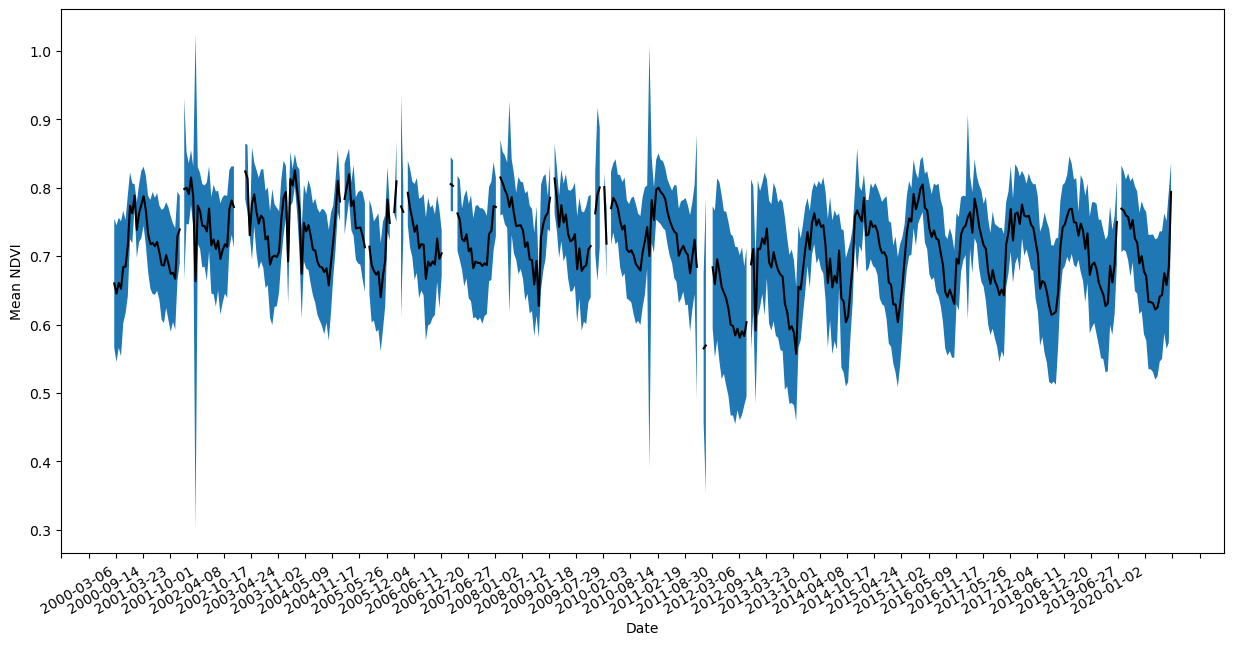

In [57]:
# let's now plot the mean NDVI:
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15,8)
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean NDVI')
ax1.plot(ndvistats.index, ndvistats['mean'], 'k-')
ax1.fill_between(ndvistats.index, np.asarray(ndvistats['mean'], dtype=float)-np.asarray(ndvistats['sd'], dtype=float), np.asarray(ndvistats['mean'], dtype=float)+np.asarray(ndvistats['sd'], dtype=float))
ax1.tick_params(axis='y')
fig.autofmt_xdate()
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 12))
plt.show()

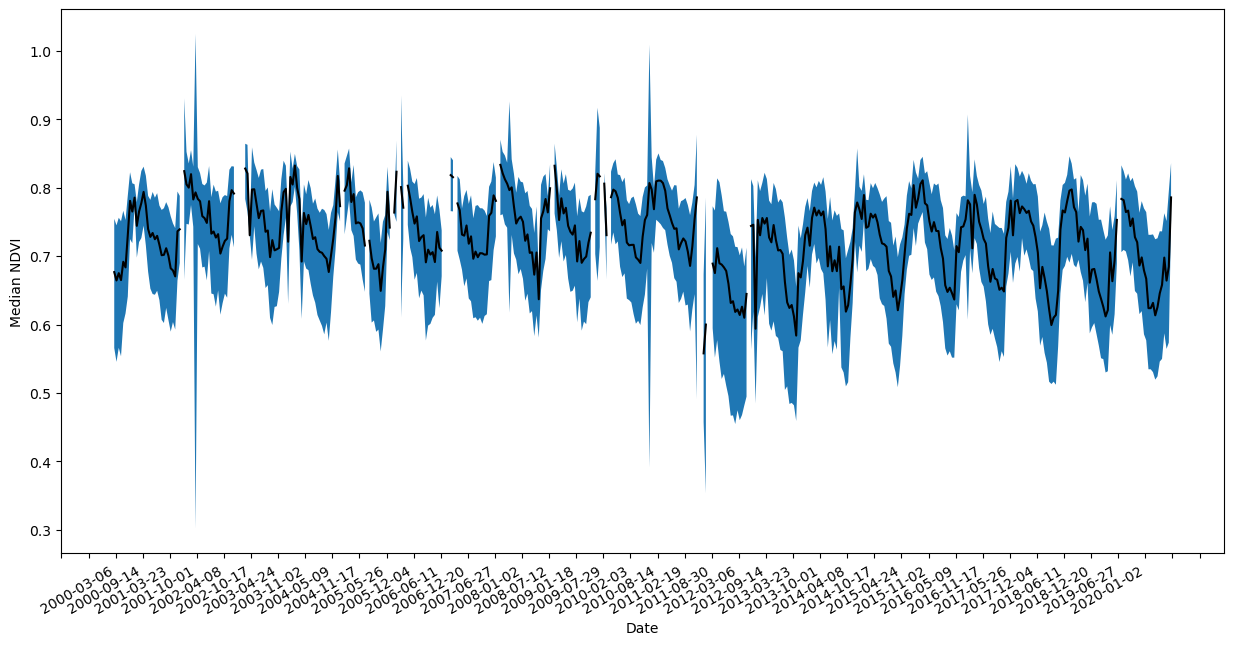

In [58]:
## plot median ndvi just to ckeck if the mean and median are similar
plt.rcParams['figure.figsize'] = (15,8)
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Median NDVI')
ax1.plot(ndvistats.index, ndvistats['median'], 'k-')
ax1.fill_between(ndvistats.index, np.asarray(ndvistats['mean'], dtype=float)-np.asarray(ndvistats['sd'], dtype=float), np.asarray(ndvistats['mean'], dtype=float)+np.asarray(ndvistats['sd'], dtype=float))
ax1.tick_params(axis='y')
fig.autofmt_xdate()
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 12))
plt.show()

## In class exercise: repeat the same process for EVI

Repeat the same process for EVI. How comparable are the EVI and NDVI graphs? Are the curves (and trends) similar?


In [94]:
def load_csv_data(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path, sep=',', header=None)

def plot_nvdi_or_evi_stats(df: pd.DataFrame, xlabel: str = None, ylabel: str = None, mean_or_median: str = "mean", title: str = None):
    if mean_or_median not in ["mean", "median"]:
        raise RuntimeError(f"Expected 'mean_or_median' to be in: ['mean', 'median']. Got: {mean_or_median}")
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax1 = plt.subplots()
    if xlabel is None:
        xlabel = 'Date'
    ax1.set_xlabel(xlabel)
    if ylabel is not None:
        ax1.set_ylabel(ylabel)
    if title is not None:
        ax1.set_title(title)
    ax1.plot(df.index, df[mean_or_median], 'k-')
    ax1.fill_between(df.index, np.asarray(df['mean'], dtype=float) - np.asarray(df['sd'], dtype=float), np.asarray(df['mean'], dtype=float) + np.asarray(df['sd'], dtype=float))
    ax1.tick_params(axis='y')
    fig.autofmt_xdate()
    ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 12))
    plt.show()
    plt.close()


file_path = os.path.join(os.getcwd(), 'data', '250m_16_days_EVI.csv')
evi_df = load_csv_data(file_path)

evi_data = evi_df.values[:, 6:]
evidata = pd.DataFrame(evi_data, index=julianTocalendar(evi_df.values[:, 2]))

evi_filt = evidata.mask(hc_pixel_reliability_values == False)

scale = 0.0001
evi_filt_scale = evi_filt * scale

evistats = pd.DataFrame(np.column_stack([evi_filt_scale.mean(axis=1, skipna=True),
                                         evi_filt_scale.median(axis=1, skipna=True),
                                         evi_filt_scale.std(axis=1, skipna=True)]),
                        columns=['mean', 'median', 'sd'], index=evi_filt_scale.index)



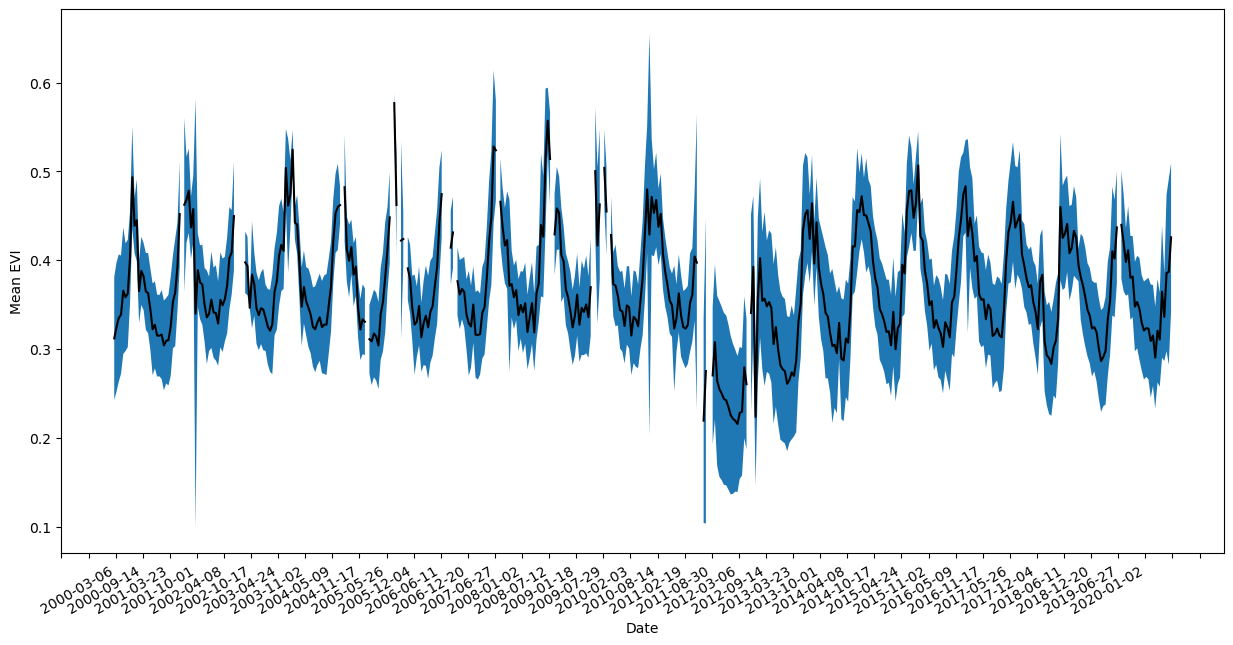

In [63]:
plot_nvdi_or_evi_stats(evistats, xlabel="Date", ylabel="Mean EVI", mean_or_median="mean")

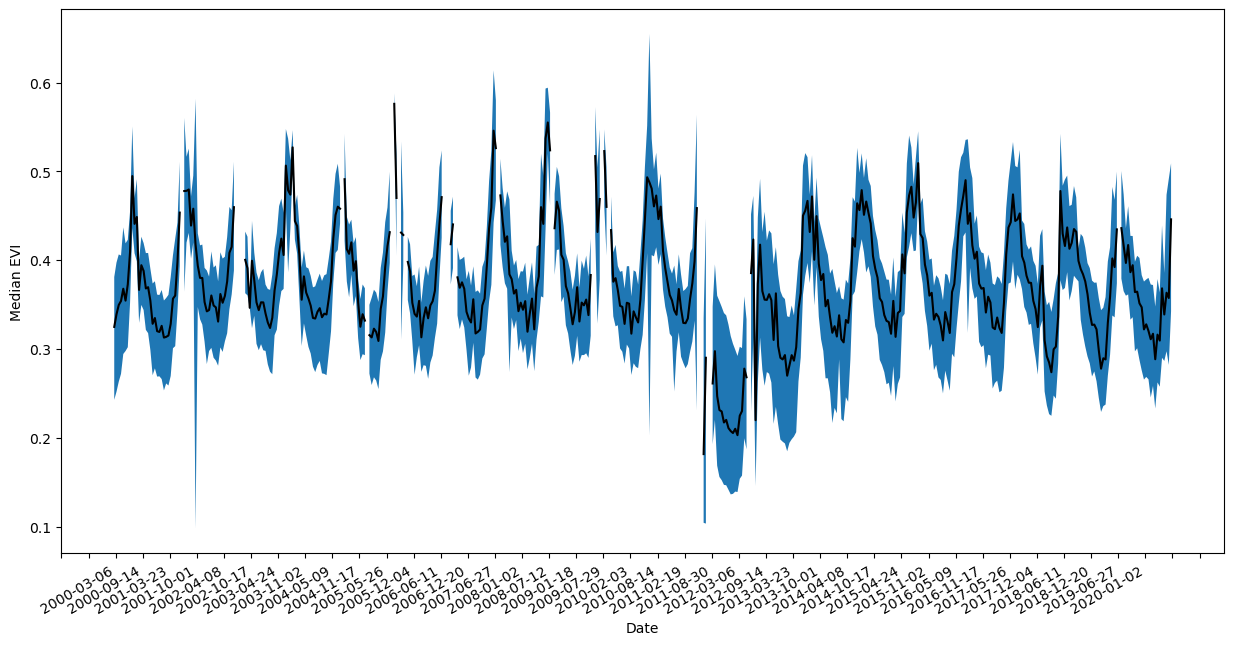

In [64]:
plot_nvdi_or_evi_stats(evistats, xlabel="Date", ylabel="Median EVI", mean_or_median="median")

## Homework 4 (7p): Calculate NDVI using MODIS surface reflectance bands. 

1. Download the MODIS Surface Reflectance product for the same location.  
You can use the CSVs for band1 (red - sur_refl_b01.csv) and band2 (nir - sur_refl_b01.csv) to obtain the pixels values. Or, if you are looking for something more challenging, you can download the geoTiffs and calculate the ndvi using the .tiff layers - however, this is not required to get all points for your HW.  

2. Compute NDVI per pixel.   
Make sure to read up on the surface reflectance product to understand whether you need to use quality flags, scaling factors, etc.  

3. Plot your NDVI values derived from the surface reflectance product with the ones from NDVI as obtained from the vegetation indices product. Do you see any differences? Why/why not?

There are differences in the quality of the NDVI derived from the surface reflectances and the NDVI provided as a vegetation index product. One difference is due to the fact that the surface reflectances are aggregated over 8 day periods, while the NDVI vegetation index product is aggregated over 16 days; therefore, we could expect a better mean representation of NDVI per pixel from the NDVI vegetation index product. We can also see this from the below plots, where there is a wider range for the mean and median of the derived NDVI from the surface reflectances as opposed to the NDVI vegetation index product.

Another difference is in the way the NDVI vegetation index product is derived to begin with where MODIS: uses a MODIS-specific compositing method based on product quality assurance metrics to remove low quality pixels. From the remaining good quality vegetation index values, a constrained view angle approach then selects a pixel to represent the compositing period (from the two highest NDVI values it selects the pixel that is closest-to-nadir). In opposition to this, the surface reflectance products are derived as: each surface reflectance pixel contains the best possible L2G observation during an 8-day period as selected on the basis of high observation coverage, low view angle, the absence of clouds or cloud shadow, and aerosol loading. Thus, the NDVI vegetation index product is derived with the NDVI in mind and uses a specific method for retaining pixels, specifically keeping in mind the goal of the highest quality NDVI per pixel. While the surface reflectance pixels provide information regardless of quality of the NDVI product and only try to maximize the view angle and coverage for each pixel without reference to specifically calculating the NDVI. This, combined with the 8-day collection period of the surface reflectances, allows us to come to the conclusion that the NDVI values per pixel may not be as high quality as that of the NDVI vegetation index product directly provided by MODIS.

**HINT**: Read up a bit on how the products were derived.   
A good matplotlib intro is available [here](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/).

In [110]:
import enum

class ModisBands(enum.Enum):
    RED = 1
    NIR = 2
    BLUE = 3
    GREEN = 4
    SWIR1 = 5
    SWIR2 = 6
    SWIR3 = 7


surface_reflectance_csv_map: dict[int, str] = {val.value: f"sur_refl_b0{val.value}.csv" for val in list(ModisBands._member_map_.values())}

from typing import Optional

def load_csv_data_w_pixel_reliability_mask_and_scale(
    file_path: str,
    scale: float,
    pixel_reliability_df: Optional[pd.DataFrame] = None,
    values_beg_idx: int = 6,
    julian_date_idx: int = 2,
) -> pd.DataFrame:
    df = load_csv_data(file_path)
    df_data = df.values[:, values_beg_idx:]
    dfdata = pd.DataFrame(df_data, index=julianTocalendar(df.values[:, julian_date_idx]))

    # For some reason, the dates aren't exactly the same between the provided pixel reliabilities and the surface reflectances downloaded, so check
    # which drop dates in pixel_reliability_df that don't cover our data. I think this may be due to the surface reflectances being collected over 8-day
    # periods as opposed to 16-day periods, like the NDVI vegetation index product.
    if pixel_reliability_df is not None:
        unique_values_in_pixel_reliability: list[str] = list(set(pixel_reliability_df.index).difference(set(dfdata.index)))
        pix_rel_df = pixel_reliability_df.copy(deep=True)
        if len(unique_values_in_pixel_reliability) > 0:
            pix_rel_df = pixel_reliability_df.drop(labels=unique_values_in_pixel_reliability, axis=0)
        dfdata = dfdata.mask(pix_rel_df == False)

    return dfdata * scale

def calculate_ndvi(red_df: pd.DataFrame, nir_df: pd.DataFrame) -> pd.DataFrame:
    nir_arr = np.asarray(nir_df.values, dtype=float)
    red_arr = np.asarray(red_df.values, dtype=float)
    ndvi_arr = np.divide(nir_arr - red_arr, nir_arr + red_arr)

    ndvi_df = pd.DataFrame(data=ndvi_arr, index=red_df.index)
    return ndvi_df

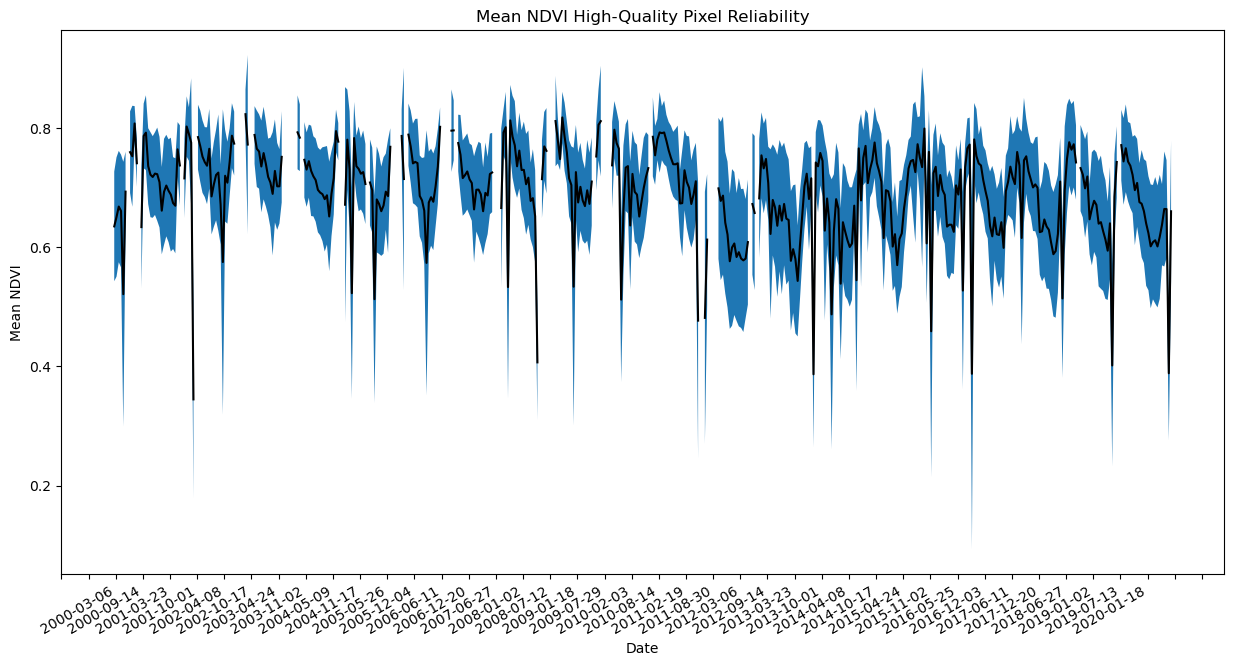

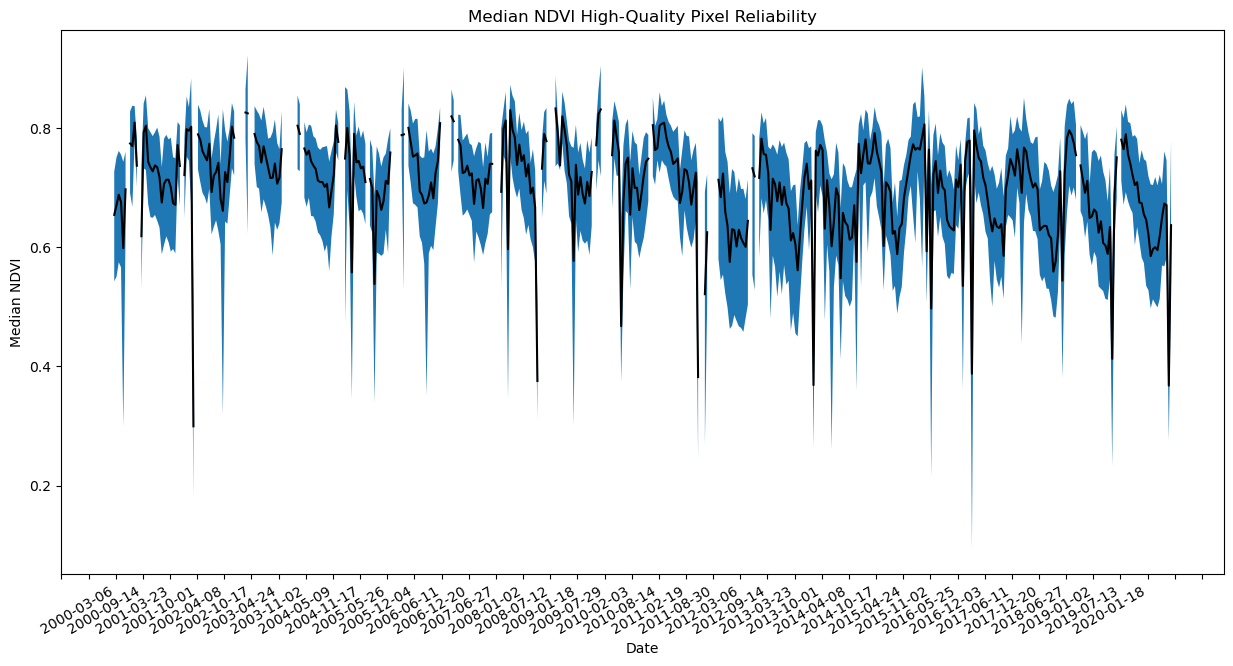

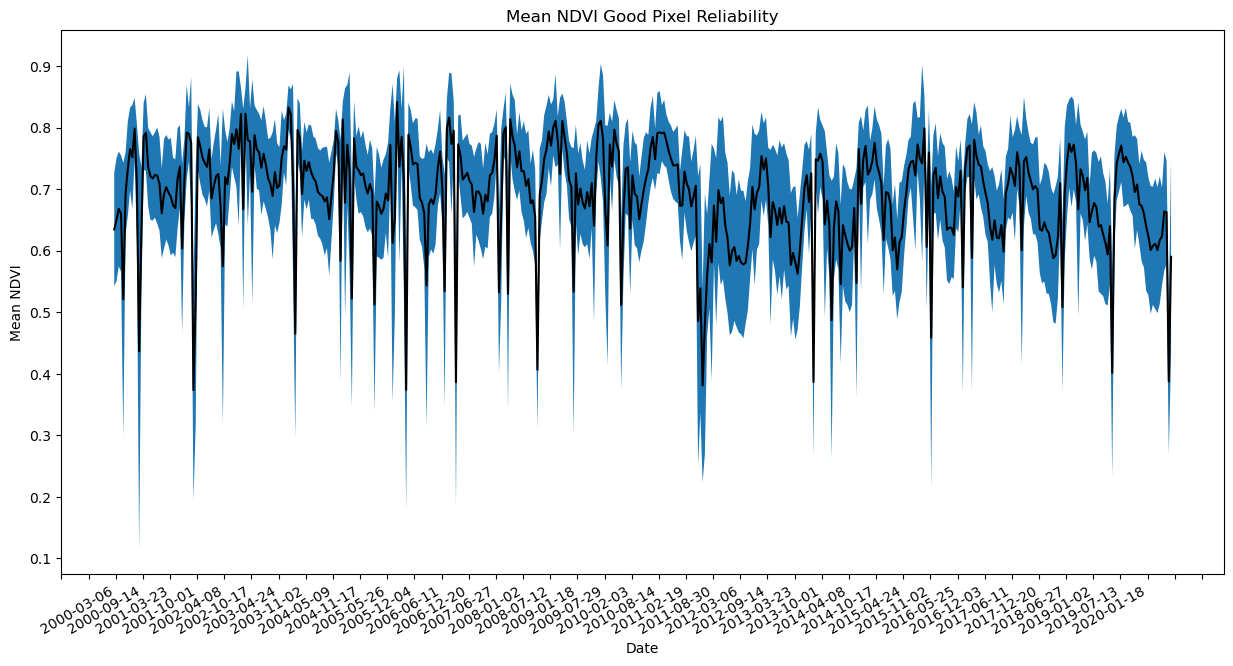

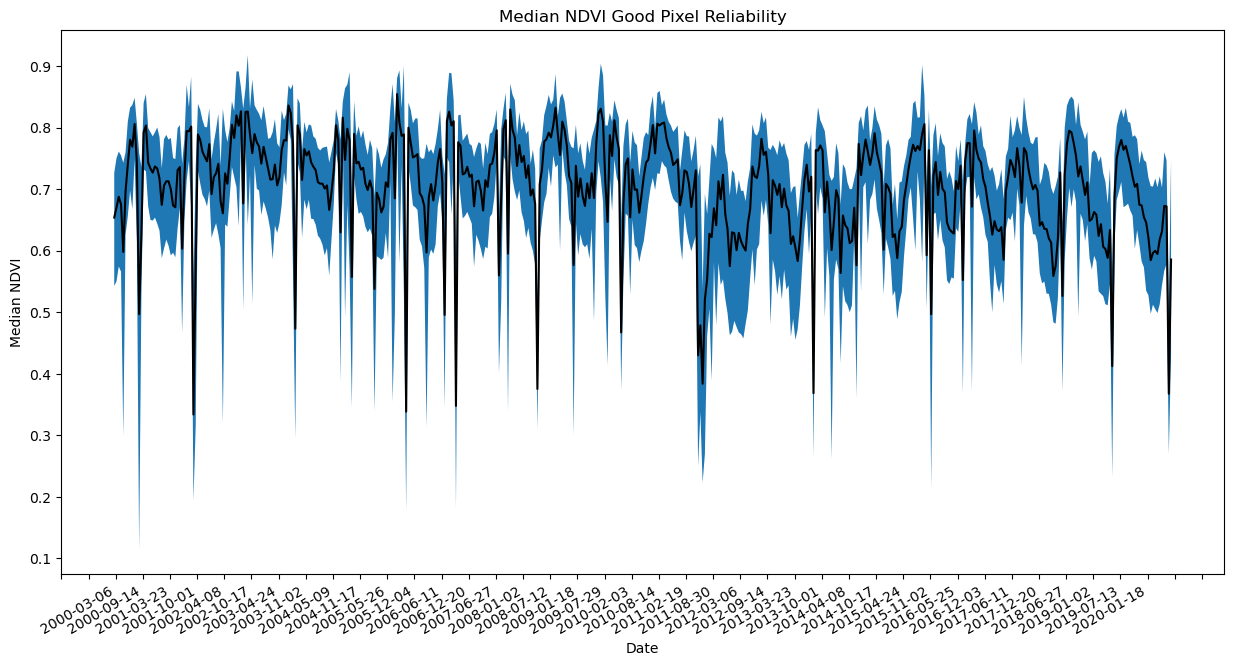

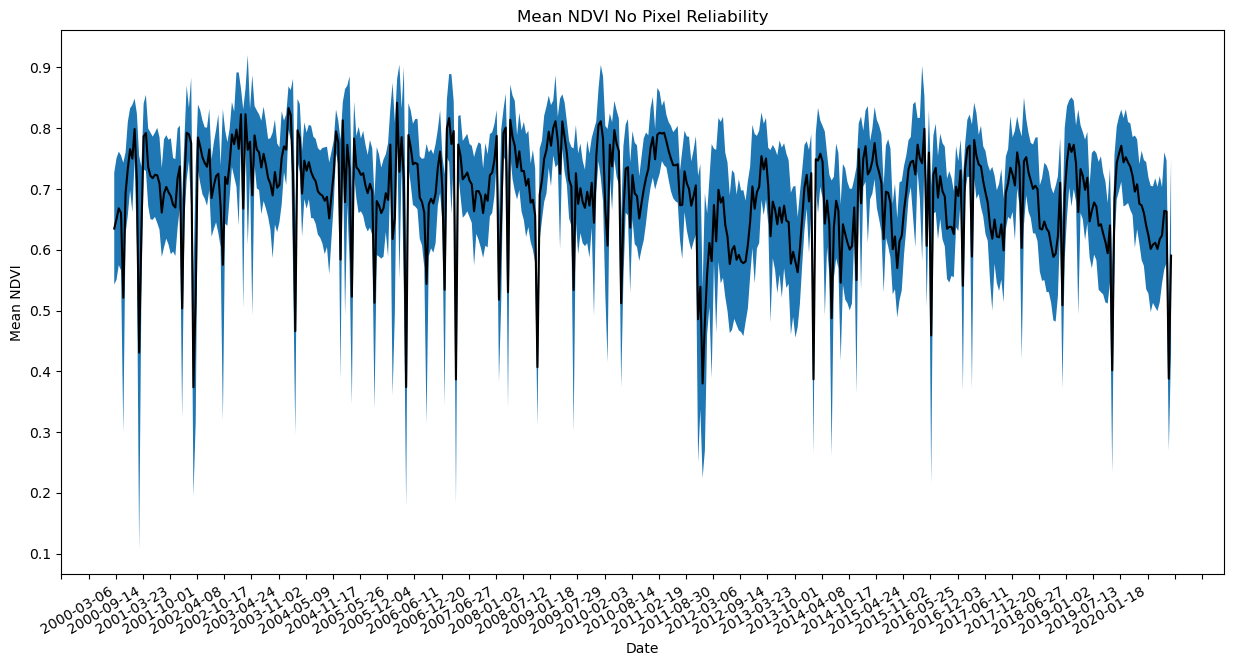

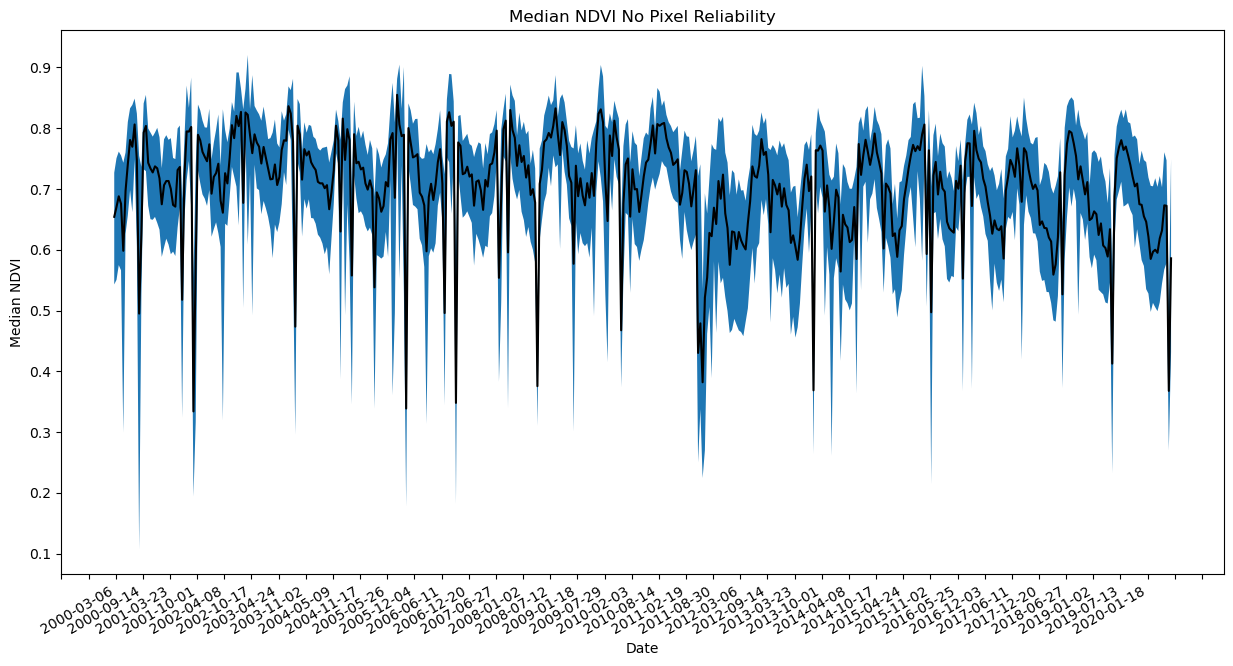

In [111]:
bands_to_load: list[ModisBands] = [ModisBands.RED, ModisBands.NIR]
scale = 0.0001
pixel_reliabilities: list[pd.DataFrame] = [hc_pixel_reliability_values, good_pixel_reliability_values, None]
titles: list[str] = [
    ["Mean NDVI High-Quality Pixel Reliability",
    "Median NDVI High-Quality Pixel Reliability"],
    ["Mean NDVI Good Pixel Reliability",
    "Median NDVI Good Pixel Reliability"],
    ["Mean NDVI No Pixel Reliability",
    "Median NDVI No Pixel Reliability"],
]
ylabels: list[str] = [["Mean NDVI", "Median NDVI"] for _ in range(len(pixel_reliabilities))]
mean_or_medians: list[str] = [["mean", "median"] for _ in range(len(pixel_reliabilities))]
filter_by_ndvistats_index: bool = True  # ensure that the dates we are using to plot the ndvi stats are the same as those of the originally downloaded NDVI product
for idx, pixel_reliability in enumerate(pixel_reliabilities):
    dfs: dict[str, pd.DataFrame] = {}
    for band_to_load in bands_to_load:
        file_path = os.path.join(os.getcwd(), 'data', surface_reflectance_csv_map[band_to_load.value])
        dfs[band_to_load.name] = load_csv_data_w_pixel_reliability_mask_and_scale(
            file_path=file_path,
            pixel_reliability_df=pixel_reliability,
            scale=scale,
        )

    ndvi_df = calculate_ndvi(dfs["RED"], dfs["NIR"])

    ndvi_stats = pd.DataFrame(np.column_stack([ndvi_df.mean(axis=1, skipna=True),
                                            ndvi_df.median(axis=1, skipna=True),
                                            ndvi_df.std(axis=1, skipna=True)]),
                            columns=['mean', 'median', 'sd'], index=ndvi_df.index)

    if filter_by_ndvistats_index:
        ndvi_stats = ndvi_stats.filter(items=ndvistats.index, axis=0)
    
    for title, ylabel, mean_or_median in zip(titles[idx], ylabels[idx], mean_or_medians[idx]):
        plot_nvdi_or_evi_stats(ndvi_stats, xlabel="Date", ylabel=ylabel, mean_or_median=mean_or_median, title=title)